# Bubble Sort

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from time import perf_counter
from matplotlib import pyplot as plt

LISTA_DE_TAMANHOS = [1000, 2000, 3000,
                     4000, 5000, 8000,
                     11_000, 15_000]



## Algoritmo de ordenação

In [2]:
def bubble_sort(
    arr:np.ndarray,
    compare : callable = lambda x, y: x > y):
  i = 0
  n = len(arr)
  houve_troca = True
  while i < n-1 and houve_troca:
    i += 1
    houve_troca = False
    for j in range(n-1):
      if compare(arr[j], arr[j+1]):
        arr[j], arr[j+1] = arr[j+1], arr[j]
        houve_troca = True

## Desempenho em Caso Aleatório

In [3]:
tempo_de_ordenamento_1 = []

for tamanho in LISTA_DE_TAMANHOS:
  # 'tamanho' números aleatórios dentro do intervalo [0, 1)
  amostra = np.random.sample(tamanho)
  start = perf_counter()
  bubble_sort(amostra)
  stop = perf_counter()
  tempo_de_ordenamento_1.append(stop - start)



## Desempenho em Pior Caso

* O pior caso é quando a lista se encontra ordenada de maneira decrescente

In [4]:
tempo_de_ordenamento_2 = []

for tamanho in LISTA_DE_TAMANHOS:
  # 'tamanho' números igualmente espaçados de 1 a 0 (nessa ordem)
  amostra = np.linspace(1, 0, tamanho)
  start = perf_counter()
  bubble_sort(amostra)
  stop = perf_counter()
  tempo_de_ordenamento_2.append(stop - start)

## Gráfico de desempenho

,tamanho,tempo (s),caso
0,1000.0,0.412404,caso aleatório
1,2000.0,1.576234,caso aleatório
2,3000.0,3.603564,caso aleatório
3,4000.0,6.803605,caso aleatório
4,5000.0,16.263960,caso aleatório
5,8000.0,26.222649,caso aleatório
6,11000.0,50.468923,caso aleatório
7,15000.0,92.600836,caso aleatório
8,1000.0,0.515454,pior caso
9,2000.0,2.083170,pior caso


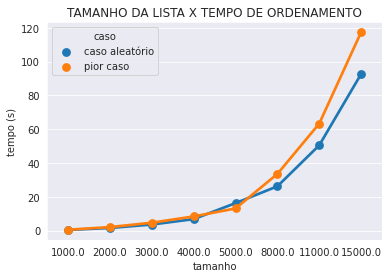

In [5]:
def _mini_dataframe(lista:np.ndarray, case:str) -> pd.DataFrame:
  df = pd.DataFrame(
      data=[LISTA_DE_TAMANHOS, lista],
      index=['tamanho', 'tempo (s)']
      ).transpose()
  
  df['caso'] = case
  return df

LISTA_DE_CASOS = ['caso aleatório', 'pior caso']
LISTA_DE_TEMPOS = [tempo_de_ordenamento_1, tempo_de_ordenamento_2]

df = pd.concat(
    [_mini_dataframe(l, c) for l, c in zip(LISTA_DE_TEMPOS, LISTA_DE_CASOS)],
    ignore_index=True)

sns.set_style('darkgrid')

sns.pointplot(
    data=df,
    x='tamanho',
    y='tempo (s)',
    hue='caso',
    ).set(
        title='TAMANHO DA LISTA X TEMPO DE ORDENAMENTO')

df